In [1]:
import ROOT as rt

Welcome to JupyROOT 6.12/07


In [37]:
fFR=rt.TFile.Open("/eos/home-g/geliu/LepUni/Histos/Simp/ZX_FR.root","read")
fMC=rt.TFile.Open("/eos/home-g/geliu/LepUni/Histos/Simp/ZX.root","read")

In [38]:
fss=['4mu','2muetau','2mumutau','2mutautau','2e2mu','2eetau','2emutau','2etautau','4l']

In [39]:
print "fs\t\tFR\t\tMC\t\tFR/MC"
for fs in fss:
    FRerr=rt.Double(0.)
    MCerr=rt.Double(0.)
    FR=round(fFR.Get("MZ2_ZX_{0}_all".format(fs)).IntegralAndError(-1,36,FRerr),1)
    MC=round(fMC.Get("MZ2_ZX_{0}_all".format(fs)).IntegralAndError(-1,36,MCerr),1)
    FRerr=round(FRerr,1)
    MCerr=round(MCerr,1)
    ratio=round(FR/MC,3)
    ratioup=round((FR+FRerr)/(MC-MCerr)-ratio,3)
    ratiodown=round(ratio-(FR-FRerr)/(MC+MCerr),3)
    print fs,"\t\t" if len(fs)<=6 else "\t",FR,"+-",FRerr,"\t",MC,"+-",MCerr,"\t",ratio,"+",ratioup,"-",ratiodown

fs		FR		MC		FR/MC
4mu 		16.5 +- 0.7 	27.2 +- 13.2 	0.607 + 0.622 - 0.216
2muetau 	46.5 +- 0.2 	30.9 +- 29.5 	1.505 + 31.852 - 0.738
2mumutau 	55.5 +- 0.4 	6.2 +- 23.8 	8.952 + -12.128 - 7.115
2mutautau 	51.6 +- 0.1 	24.3 +- 33.2 	2.123 + -7.932 - 1.227
2e2mu 		14.1 +- 0.7 	7.9 +- 10.6 	1.785 + -7.266 - 1.061
2eetau 		35.4 +- 0.2 	31.6 +- 18.3 	1.12 + 1.557 - 0.415
2emutau 	40.1 +- 0.3 	32.2 +- 14.5 	1.245 + 1.037 - 0.393
2etautau 	34.5 +- 0.1 	40.7 +- 34.6 	0.848 + 4.824 - 0.391
4l 		294.1 +- 1.1 	201.0 +- 67.6 	1.463 + 0.75 - 0.372


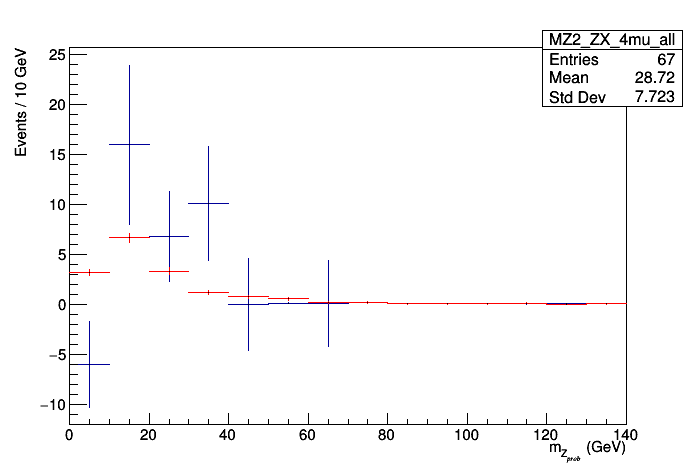

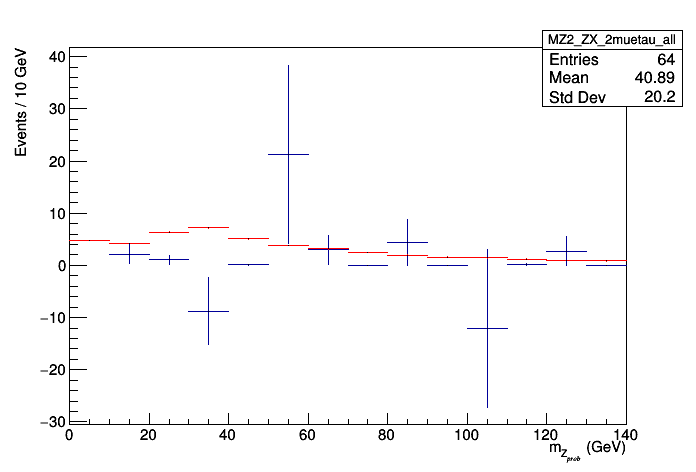

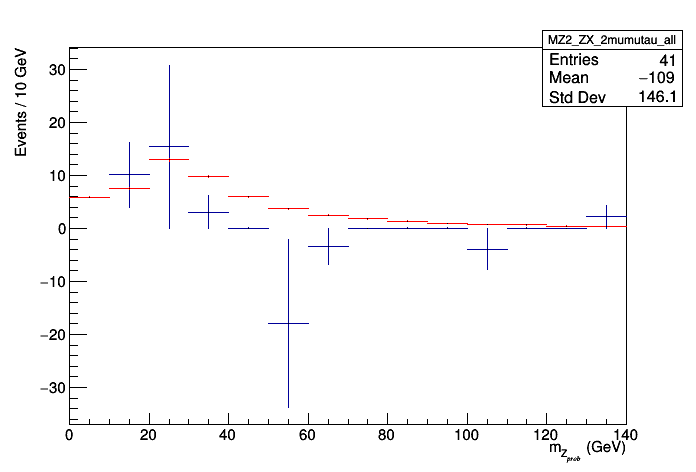

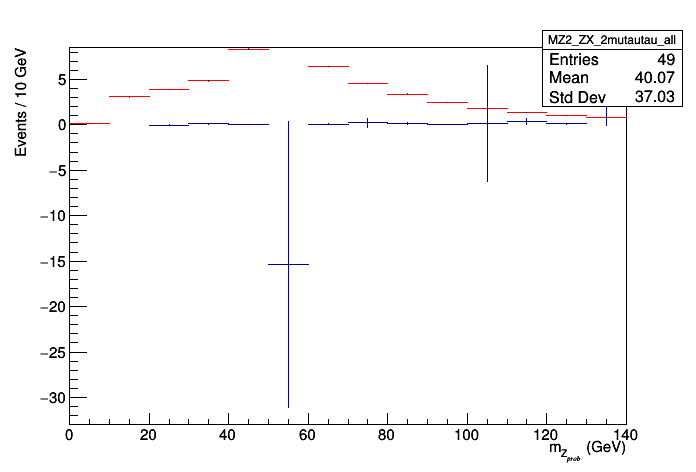

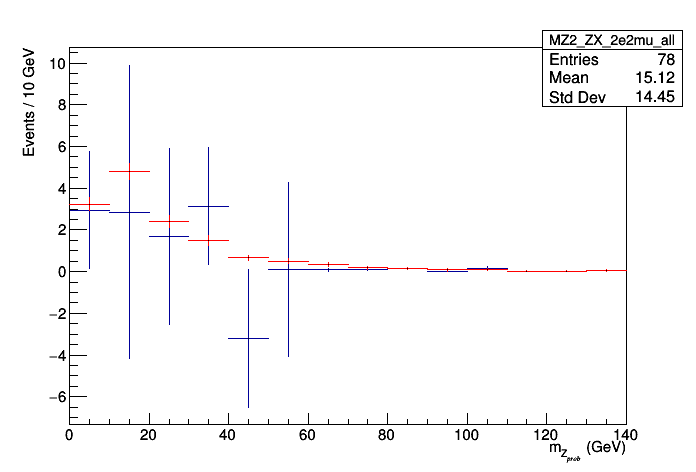

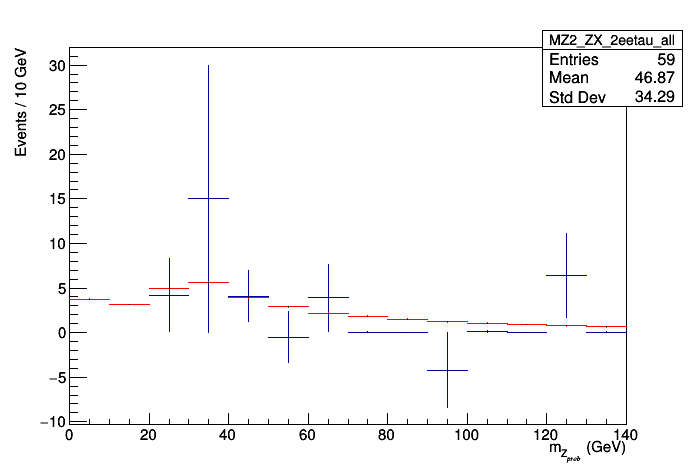

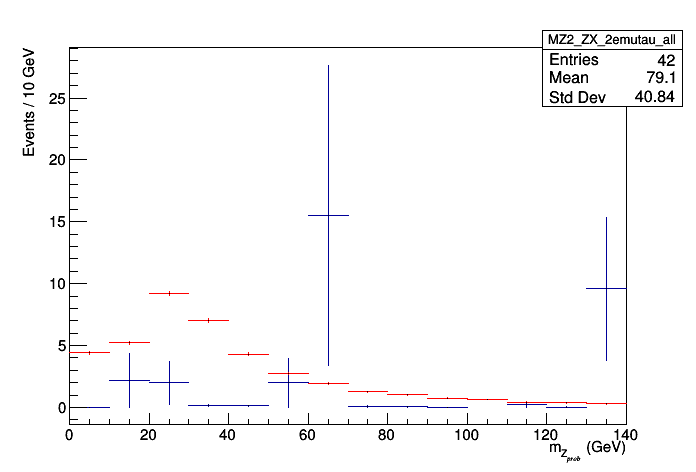

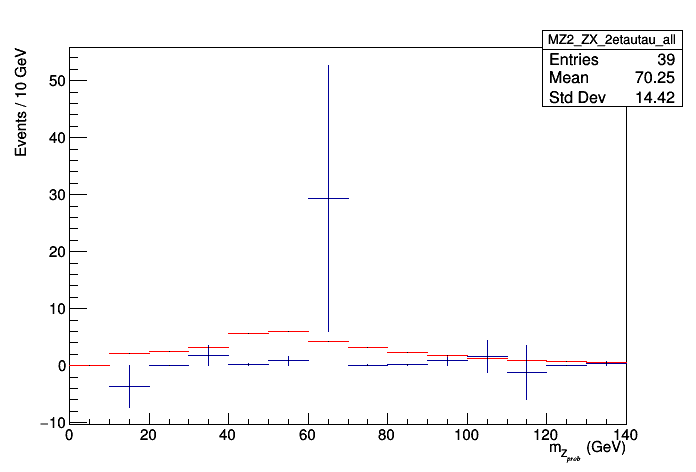

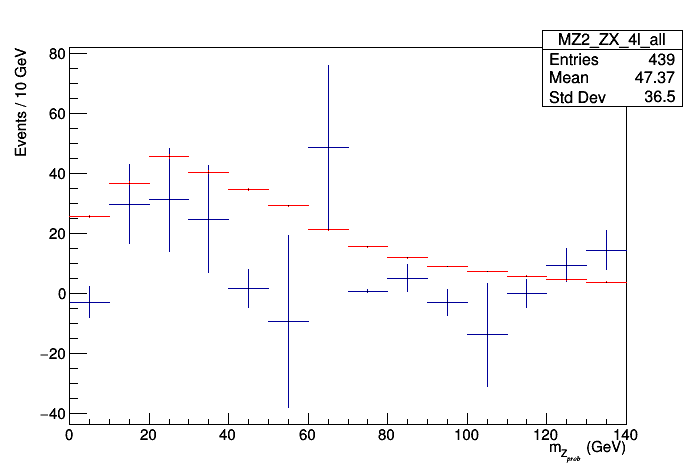

In [40]:
cs=[]
for fs in fss:
    c=rt.TCanvas(fs,fs)
    cs.append(c)
    fMC.Get("MZ2_ZX_{0}_all".format(fs)).Draw()
    fFR.Get("MZ2_ZX_{0}_all".format(fs)).SetLineColor(rt.kRed)
    fFR.Get("MZ2_ZX_{0}_all".format(fs)).Draw("same")
    c.Draw()

In [10]:
fData=rt.TFile.Open("/eos/home-g/geliu/LepUni/Histos/Simp/Data.root","read")

In [7]:
for fs in fss:
    print fData.Get("MZ2_Data_{0}_all".format(fs)).Integral()

442.0
38.0
62.0
110.0
315.0
48.0
40.0
71.0
1126.0


In [8]:
fDataBig=rt.TFile.Open("/eos/home-g/geliu/LepUni/BigTrees/Simp/AllData/HTauTauHMuMu.root","read")

In [11]:
fDataBig.Get("ZZTree/candTree").GetEntries()

1960L